# Autocorrelation - Lag variables extraction of HasPromotions and IsOpen


In [73]:
# line plot of time series
from pandas import Series
import pandas as pd
import matplotlib.pyplot as plt
# load dataset
dataset = pd.read_csv('./dataset/preprocessed_PCA_train.csv')

In [74]:
dataset['Date'] = pd.to_datetime(dataset['Date'],format='%d/%m/%Y')
dataset.head()

,Unnamed: 0,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,...,MeanRegionSales,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,0,1000,2016-03-01,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.002568,2.966701e-08,-0.000068,0.001210,-0.000466,-0.000427,-0.000009,0.000040,-0.000094
1,1,1000,2016-03-02,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.002401,-1.536007e-04,-0.000612,0.001106,0.000105,-0.000473,0.000161,-0.000092,0.000011
2,2,1000,2016-03-04,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.002459,-1.261786e-04,-0.000314,0.001157,0.000195,-0.000385,0.000475,0.000077,-0.000037
3,3,1000,2016-03-05,0,1,0,Hyper Market,General,326,7,...,3906.263994,0.003163,-1.958330e-04,-0.000320,0.001137,0.001247,-0.000392,0.000195,-0.000204,-0.000058
4,4,1000,2016-03-06,0,0,0,Hyper Market,General,326,7,...,3906.263994,0.003345,-1.307502e-04,-0.001070,0.001015,0.000700,0.000271,0.000053,-0.000032,0.000054


In [75]:
dataset.shape

(523021, 48)

In [76]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count",
                    'IsOpen':sum,
                    'HasPromotions':sum}
sumofstores = dataset.groupby('Date').agg(aggregation_dict)
sumofstores = sumofstores.reset_index()
sumofstores['Date'] = pd.to_datetime(sumofstores['Date'], errors='coerce')  #important otherwise no ticks
sumofstores.head(40)

,Date,NumberOfSales,NumberOfCustomers,StoreID,IsOpen,HasPromotions
0,2016-03-01,2859022,200201,749,746,0
1,2016-03-02,3391931,226783,749,746,0
2,2016-03-04,3463684,232784,749,746,0
3,2016-03-05,3194694,208141,749,746,0
4,2016-03-06,79491,7717,749,10,0
5,2016-03-07,5289204,302987,749,746,749
6,2016-03-08,4279299,261456,749,745,749
7,2016-03-09,3856111,242404,749,745,749
8,2016-03-10,3811159,242593,749,745,749
9,2016-03-11,3873215,246599,749,745,749


In [77]:
#Sampling
sample=sumofstores.iloc[:200]

## Distribution of open stores

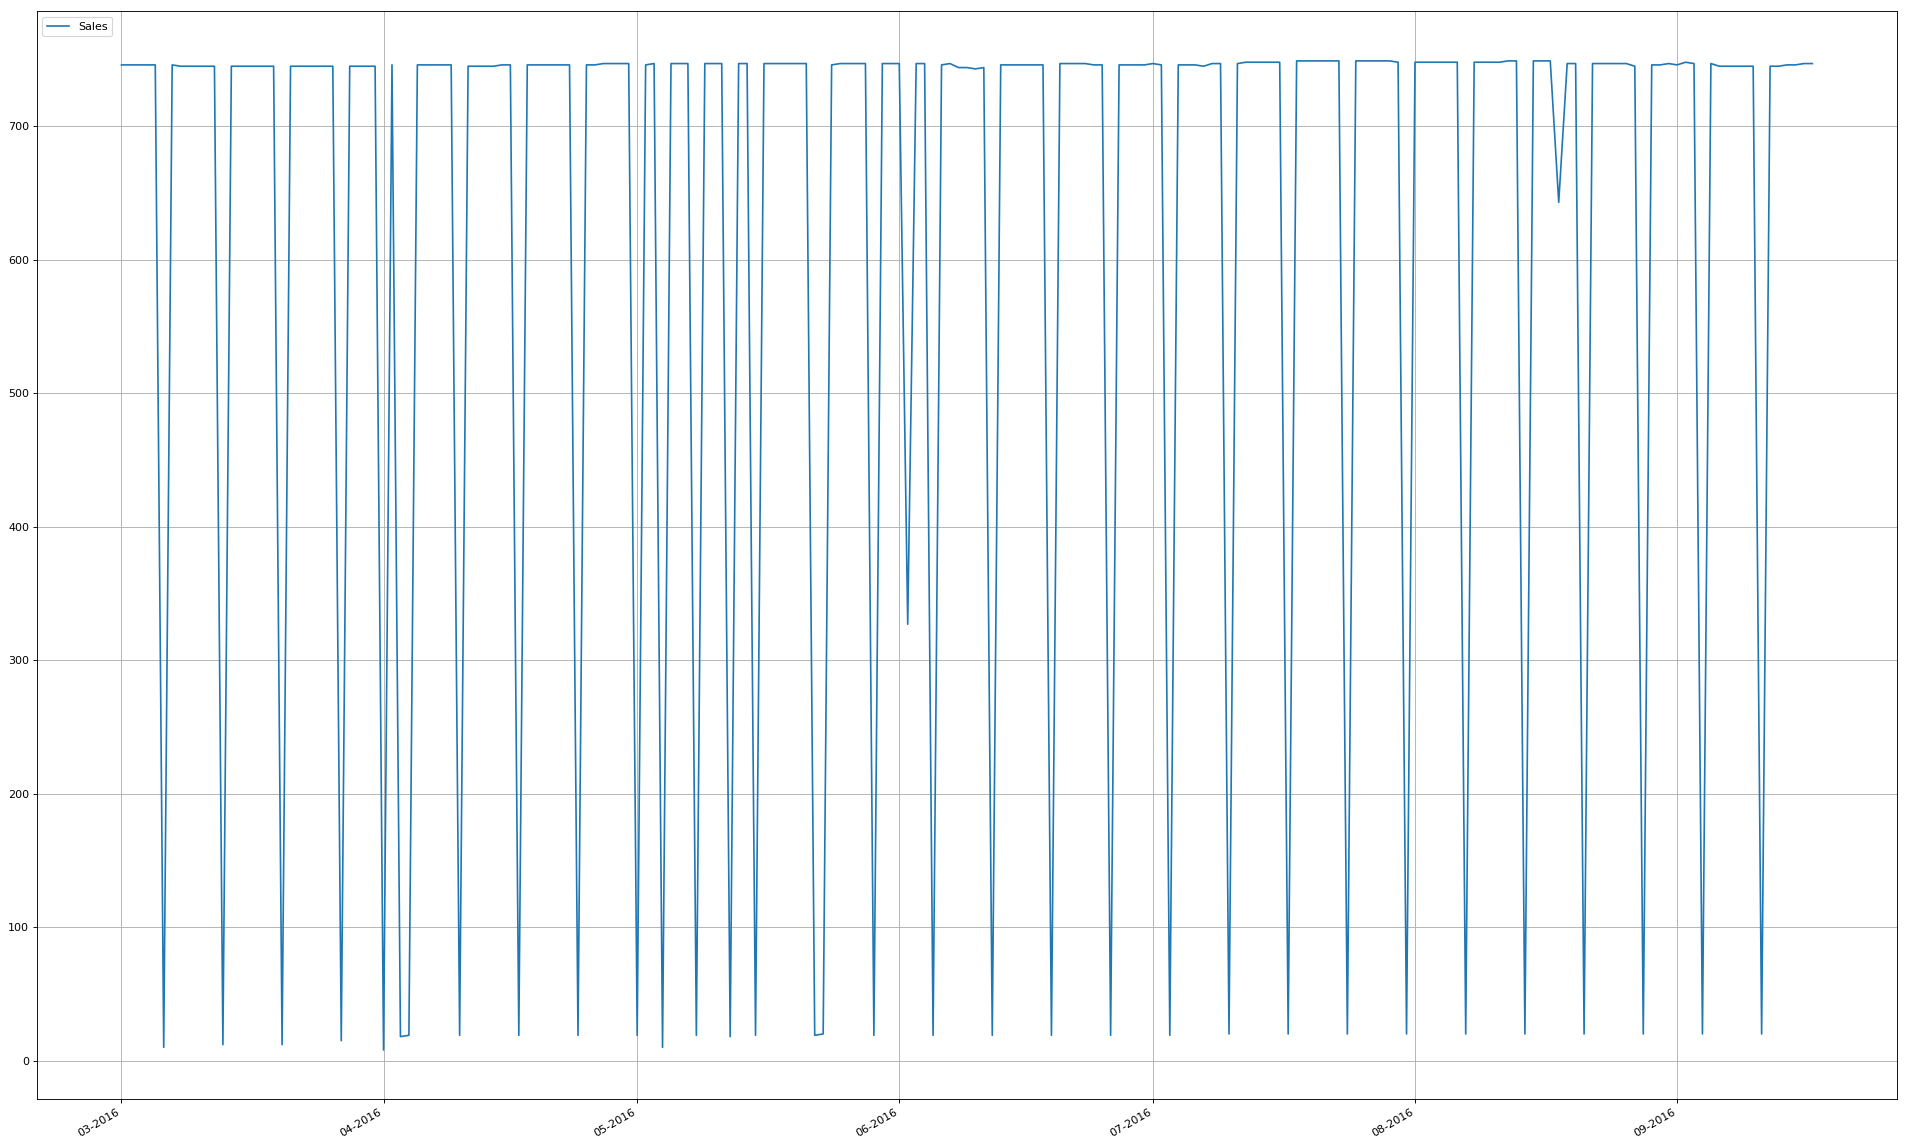

In [78]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%m')
yearsFmt = mdates.DateFormatter('%Y')
monthsYearFmt = mdates.DateFormatter('%m-%Y')

plt.rcParams['figure.figsize'] = [30.0,20.0]
plt.rcParams['figure.dpi']=80
fig, ax = plt.subplots()
    
# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
    
ax.plot(sample.Date, sample.IsOpen)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
ax.grid(True)
plt.legend(['Sales'], loc='upper left')

fig.autofmt_xdate()
plt.show()

## Distribution of Promotions in time

Important consideration: the seasonality is strictly related to the promotions, we should plot them one on the other to check this hypothesis

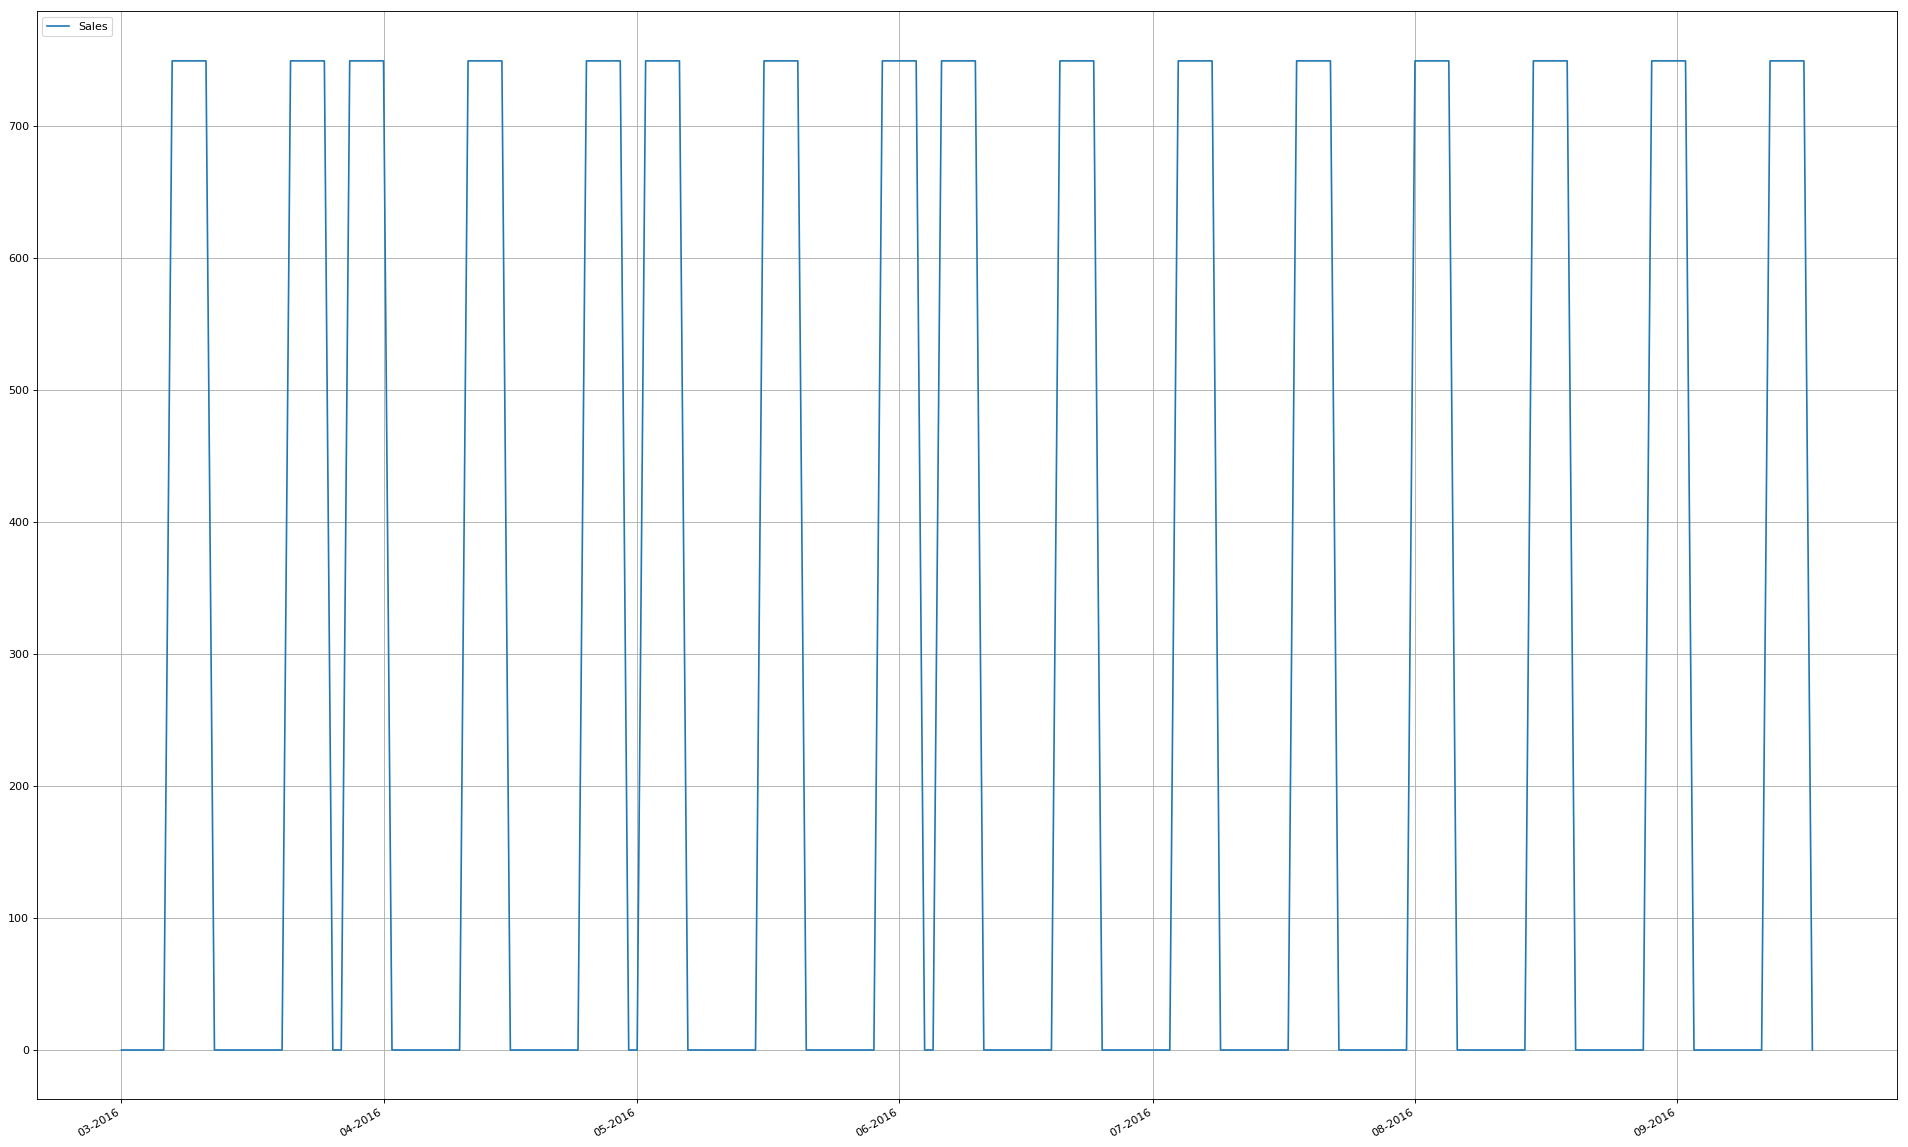

In [79]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%m')
yearsFmt = mdates.DateFormatter('%Y')
monthsYearFmt = mdates.DateFormatter('%m-%Y')

plt.rcParams['figure.figsize'] = [30.0,20.0]
plt.rcParams['figure.dpi']=80
fig, ax = plt.subplots()
    
# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
    
ax.plot(sample.Date, sample.HasPromotions)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
ax.grid(True)
plt.legend(['Sales'], loc='upper left')

fig.autofmt_xdate()
plt.show()

## Autocorrelation plot (Correlogram)
It shows the correlation of each lagged observation and whether or not the correlation is statistically significant.

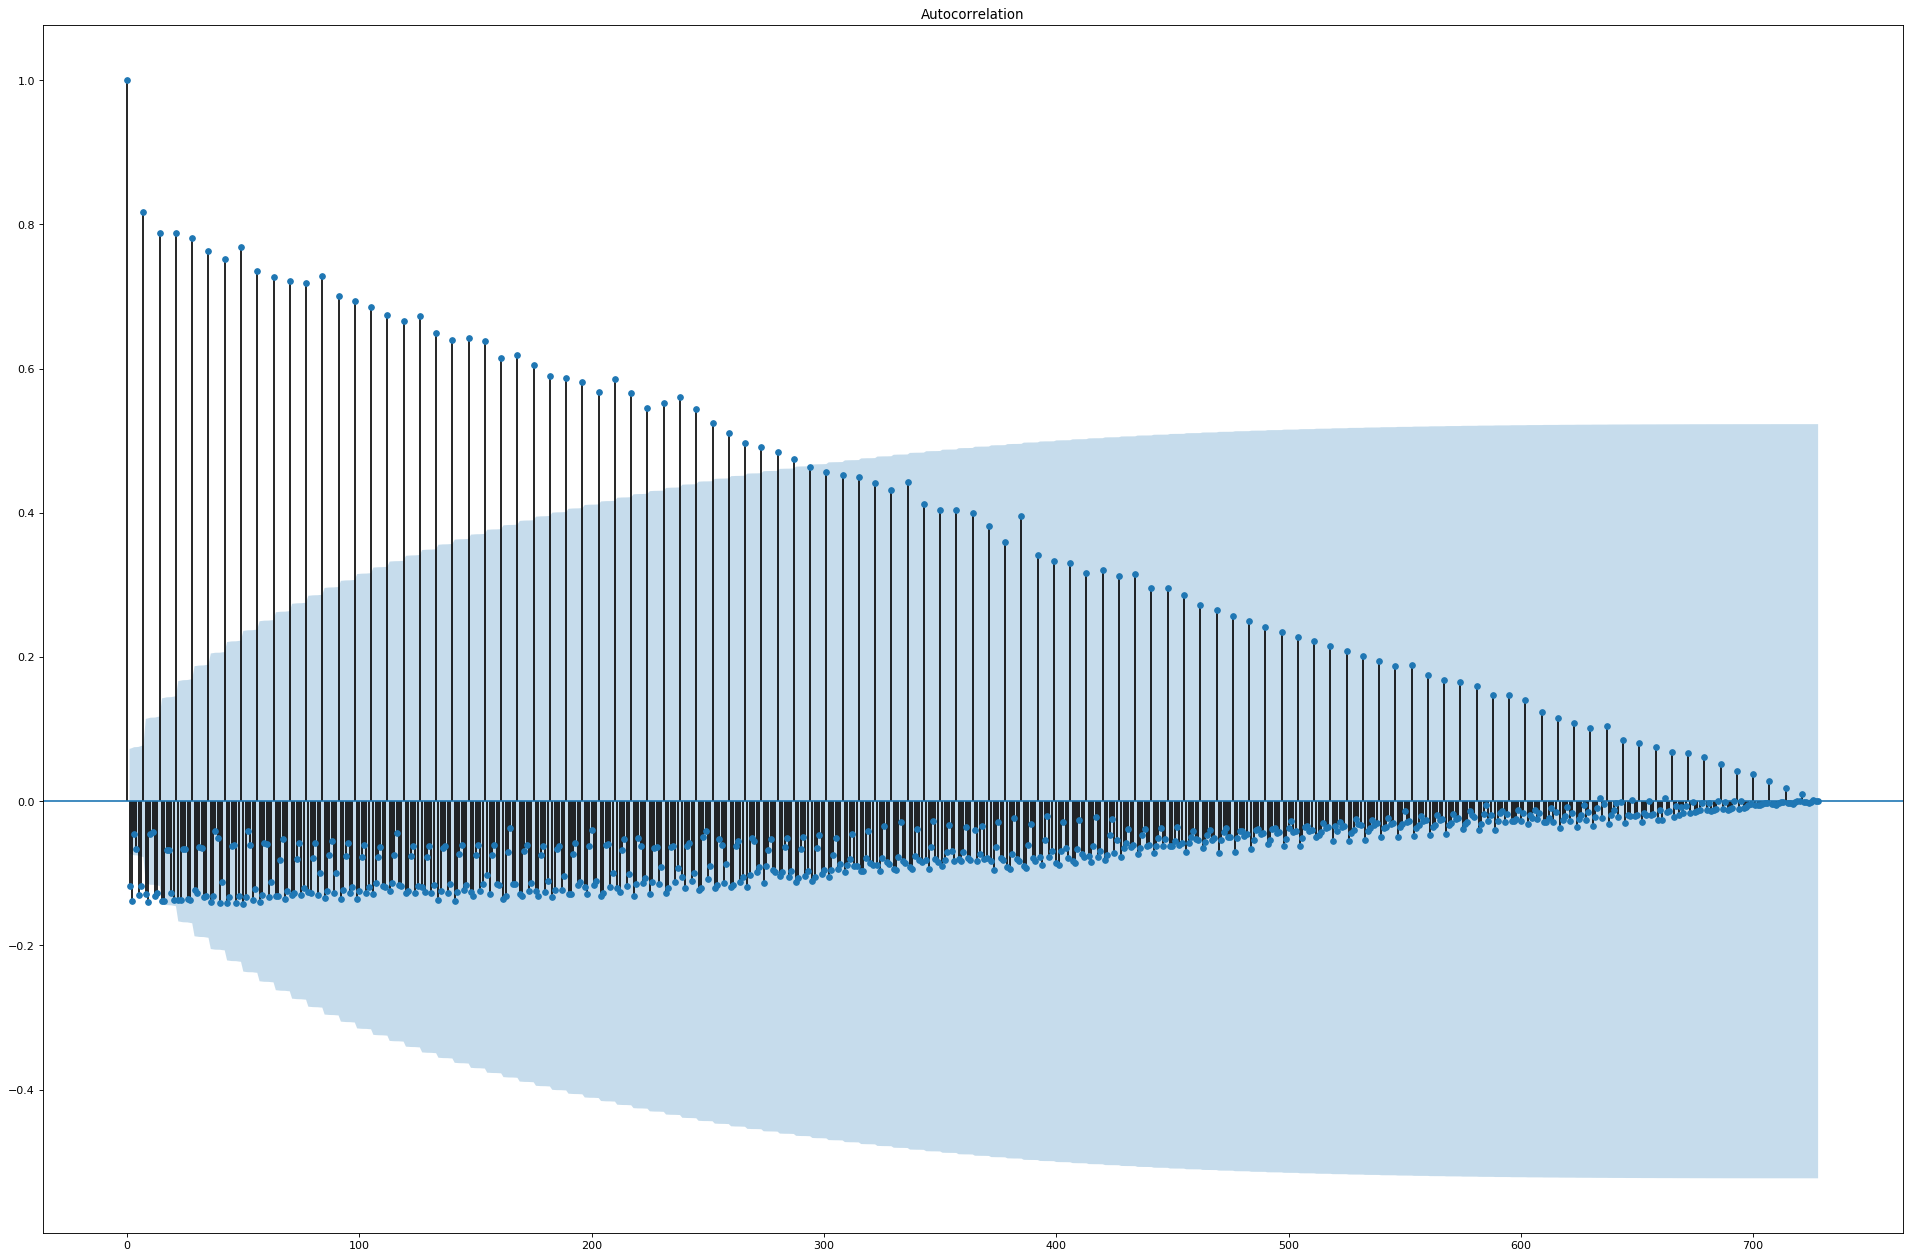

In [80]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sumofstores['IsOpen'])
plt.show()

Since the ACF pattern clearly show a linear autocorrelation decay, the analysis must be performed on a differentiation

# IS OPEN case

## Removing seasonality and trend, stationary Time Series
The main seasonality is clearly on the week (monday-sunday), let's create a seasonality adjusted time series

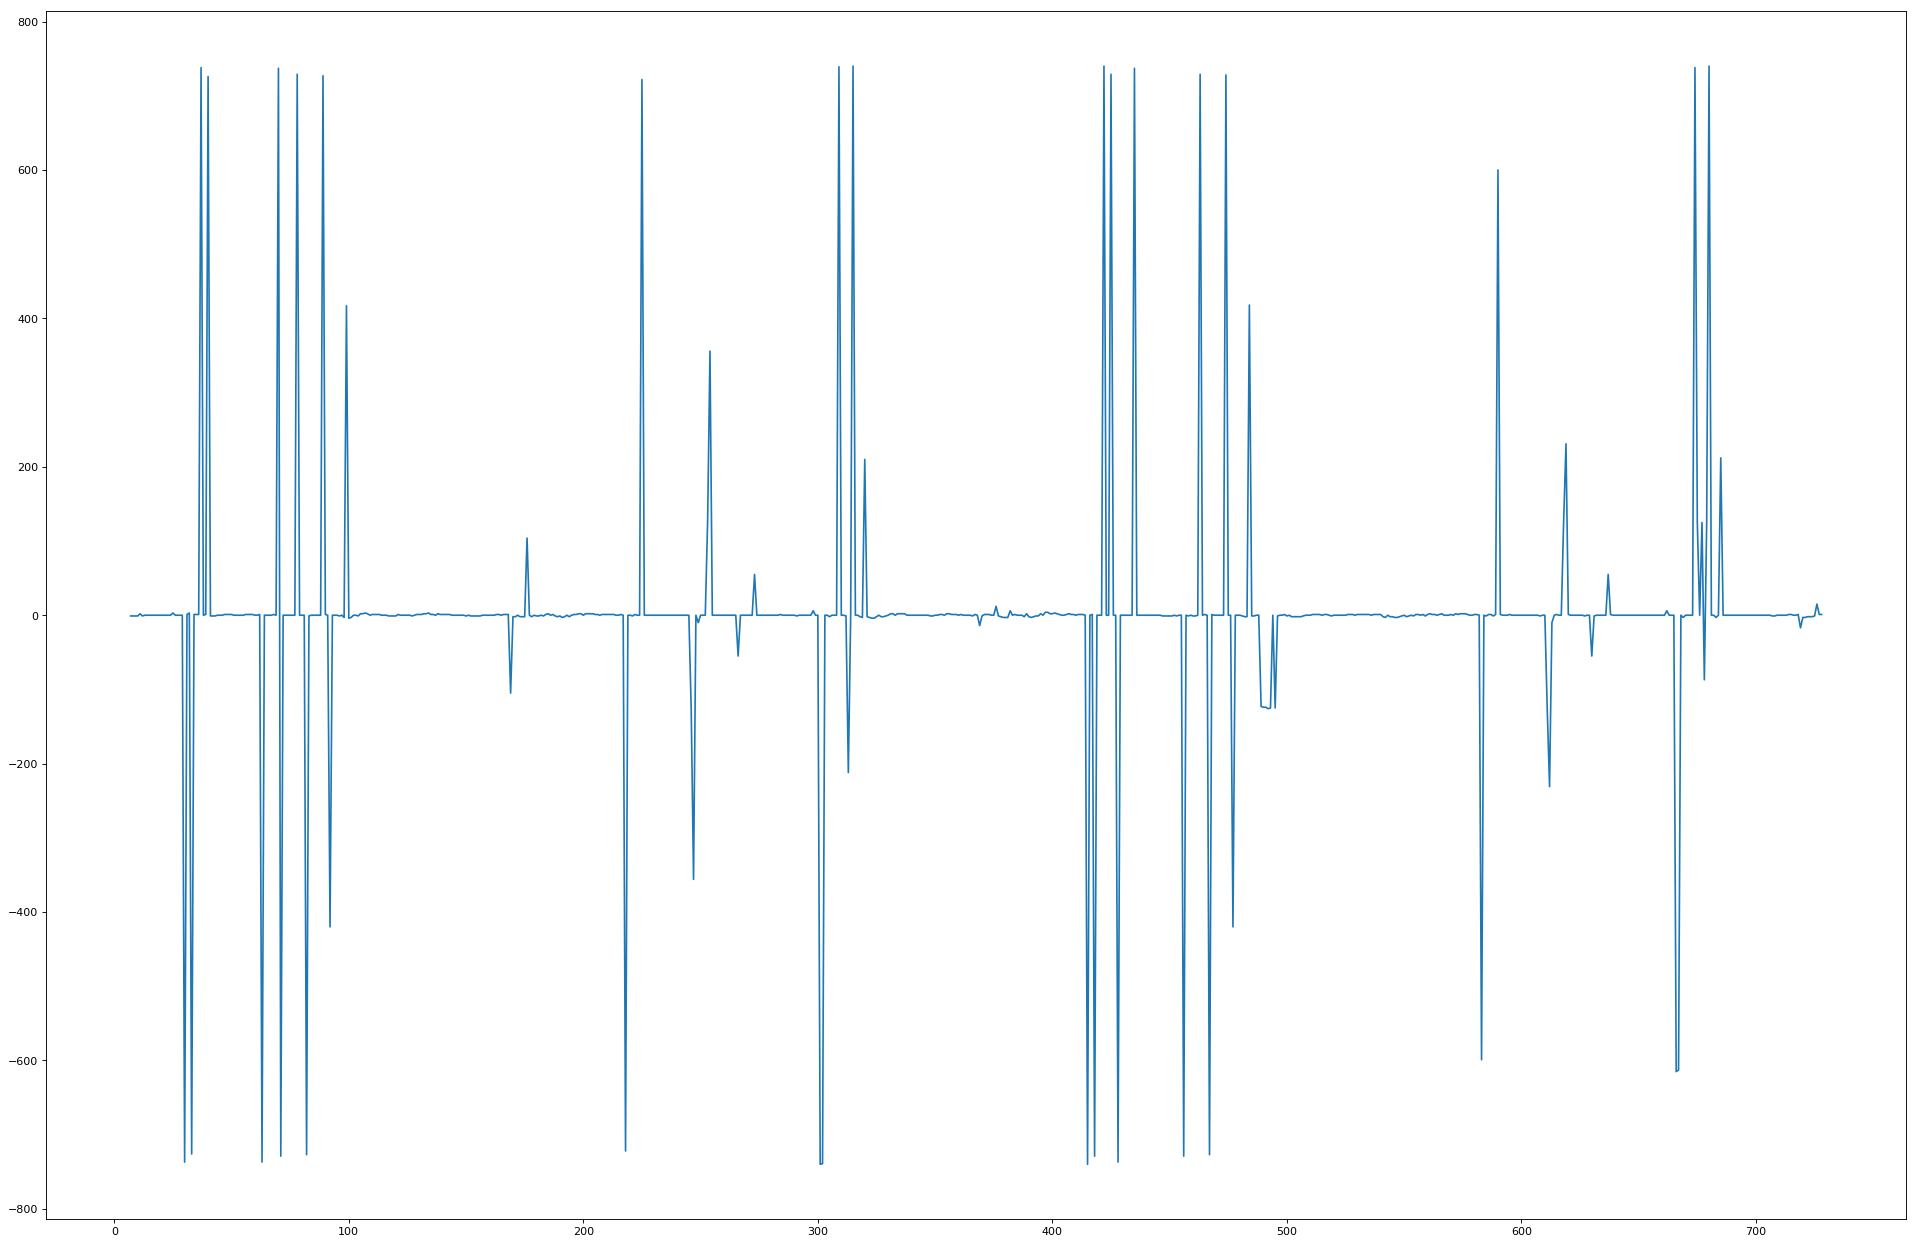

In [81]:
# seasonal difference
differenced = sumofstores.IsOpen.diff(7)
# trim off the first year of empty data
differenced = differenced[7:]
# save differenced dataset to file
#differenced.to_csv('seasonally_adjusted.csv')
# plot differenced dataset
differenced.plot()
plt.show()

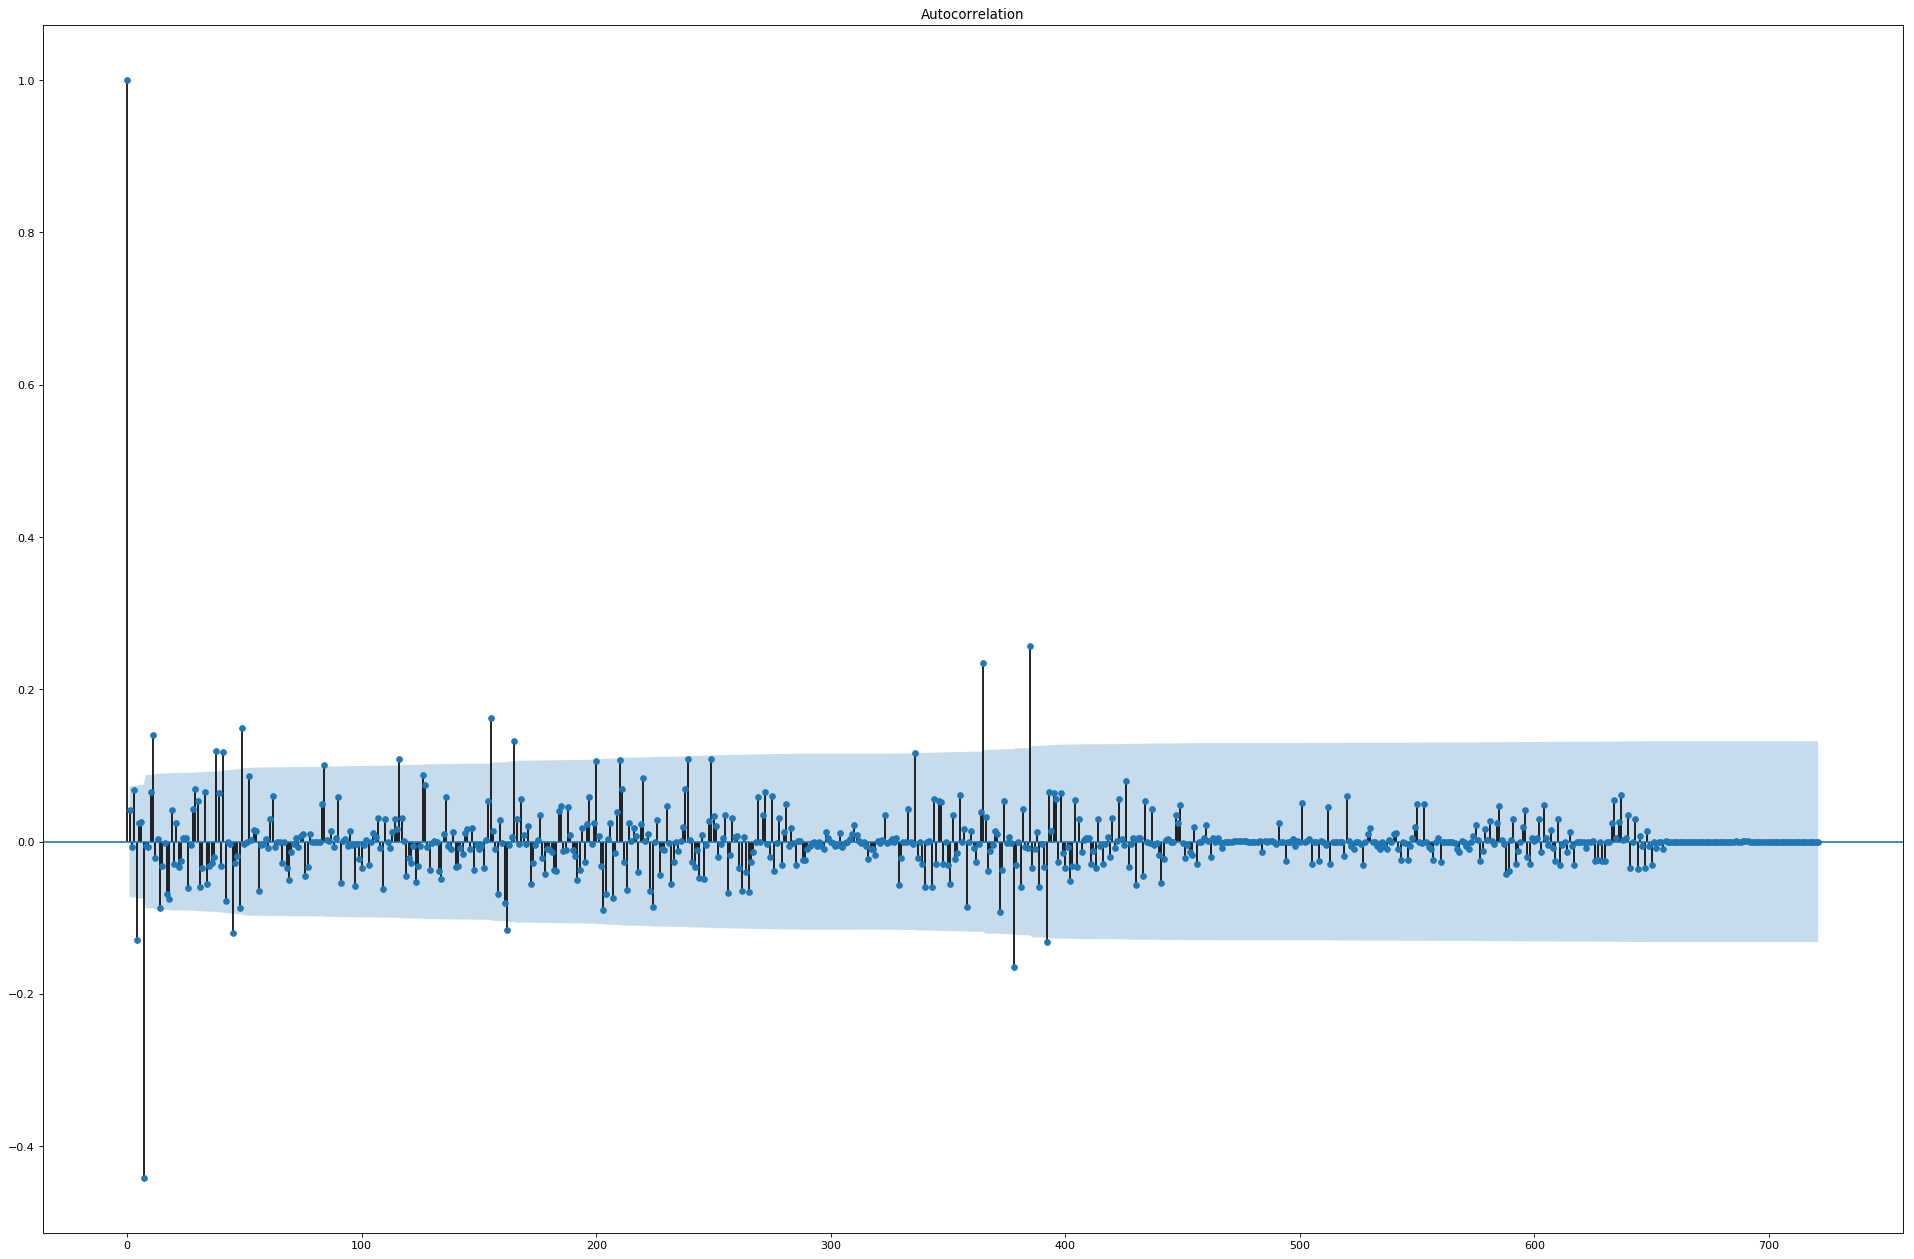

In [82]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(differenced)
plt.show()

This went fine

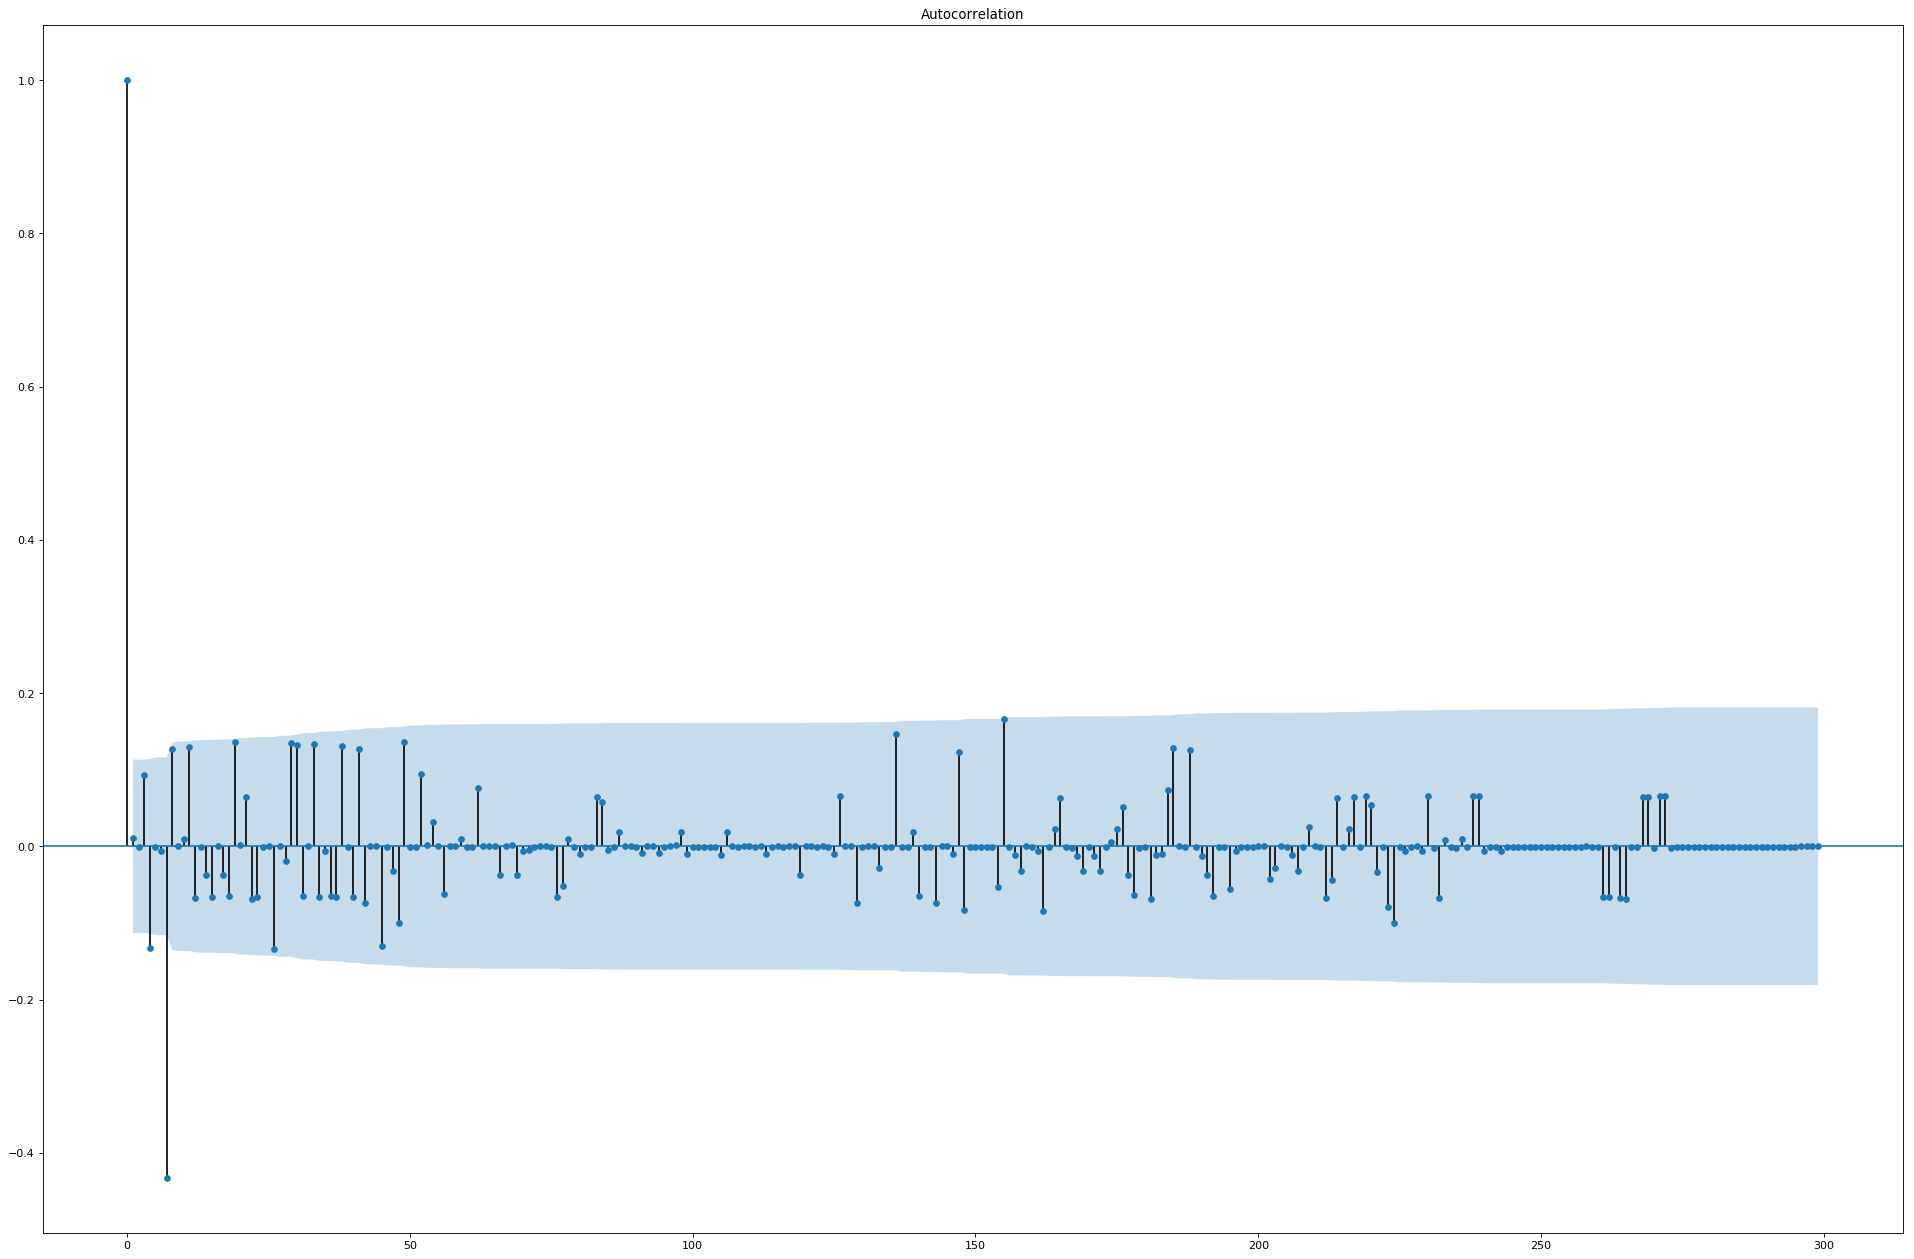

In [83]:
plot_acf(differenced[:300])
plt.show()

__The most important (statistically significant) lags identified are__ 
*  7,4

## Partial autocorrelation

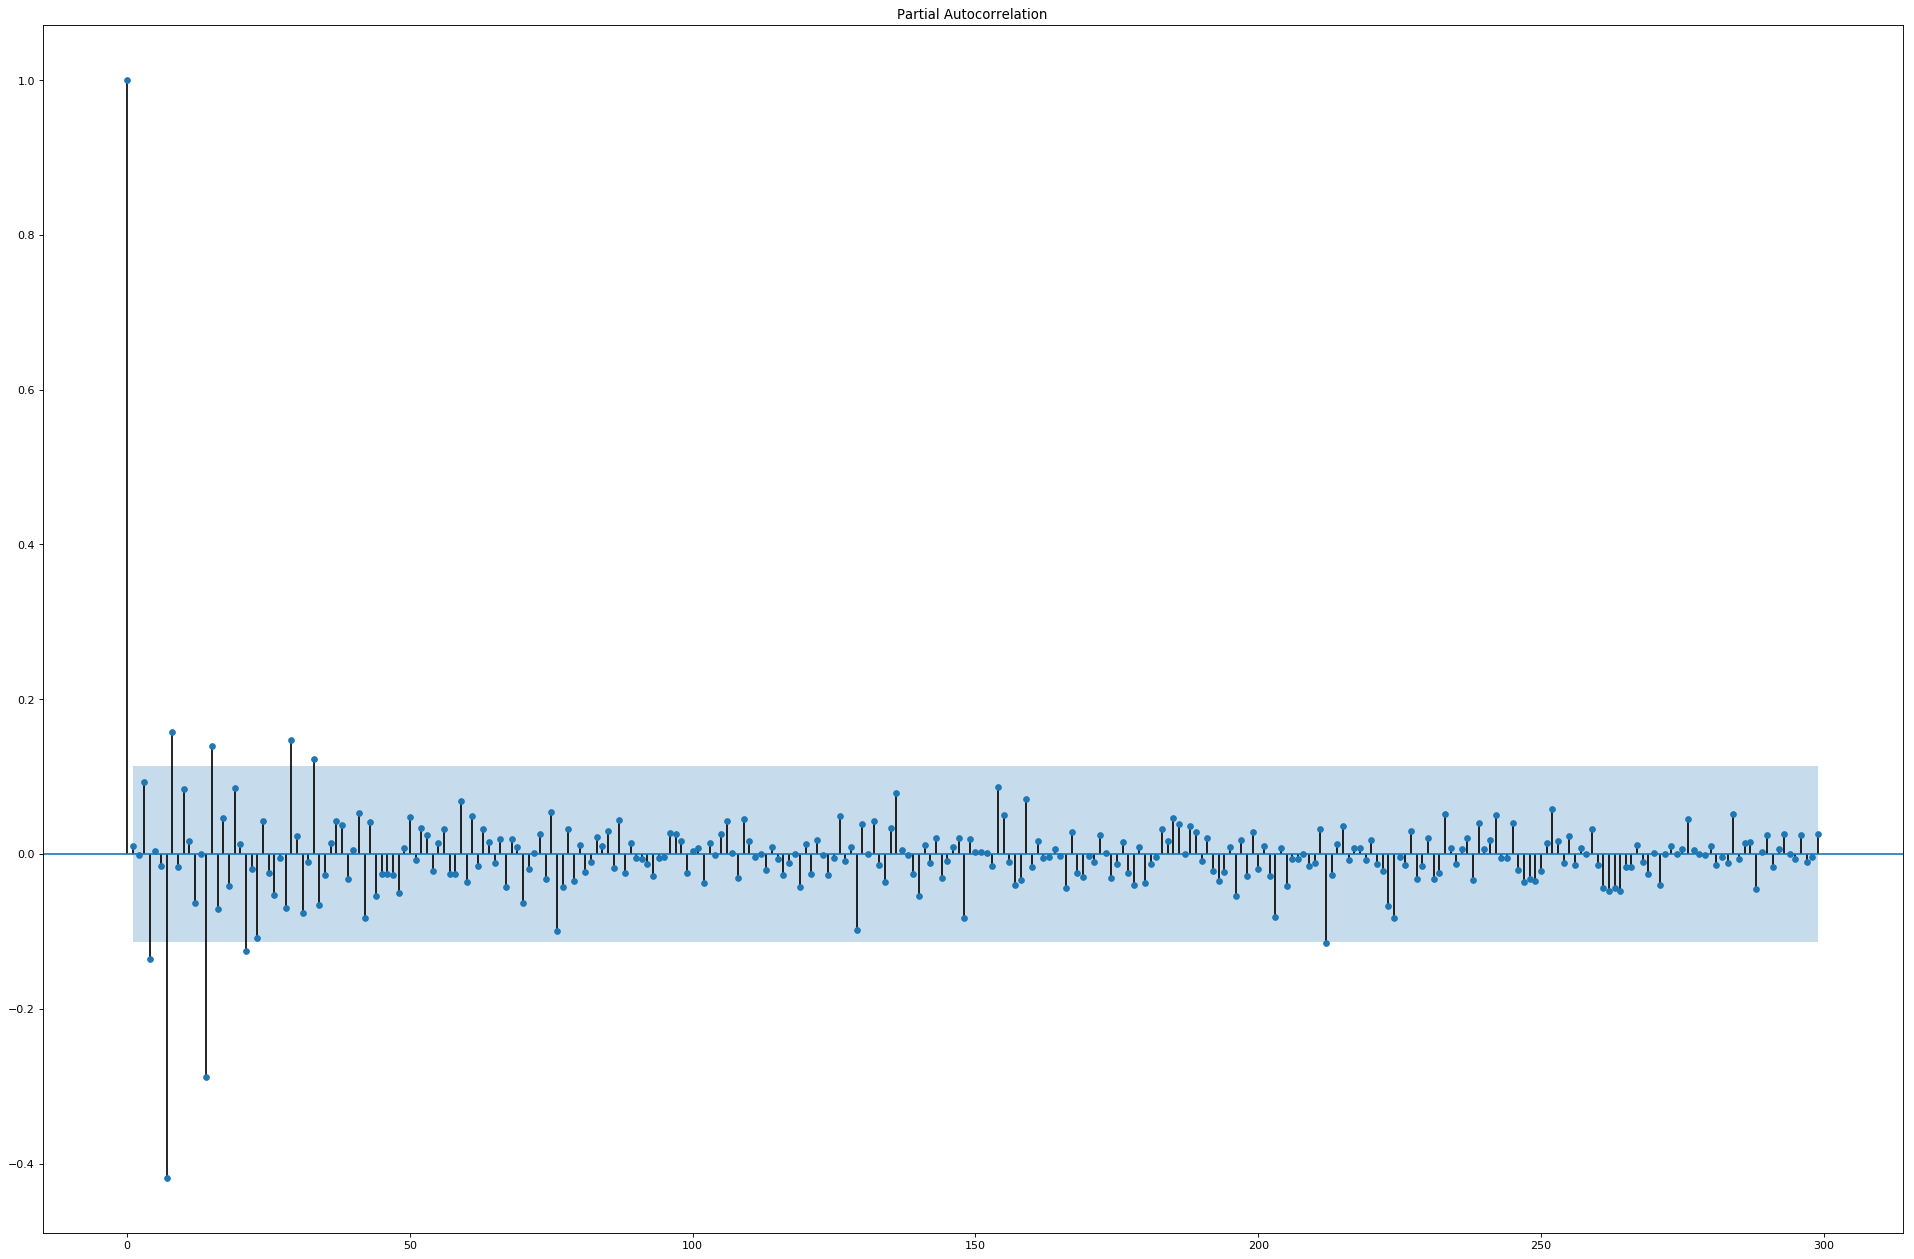

In [84]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(differenced[:300])
plt.show()

In [85]:
lags_ordered_importance = ['7','4','1']
#dataset['t-'+str(lags_ordered_importance[1])]=dataset['NumberOfSales'].shift(int(lags_ordered_importance[1]))

In [86]:
n_lags = 3
for i in range(n_lags):
    dataset['IsOpen_t-'+str(lags_ordered_importance[i])] = \
                dataset['IsOpen'].shift(int(lags_ordered_importance[i]))
    #dataset['t'] = series.values
    #dataset.head(20)
    #dataset = dataset[20:]
 


In [59]:
#dataset =dataset[int(max(lags_ordered_importance)):]

In [87]:
array = dataset.values

In [88]:
dataset.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
StoreID,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Date,2016-03-01 00:00:00,2016-03-02 00:00:00,2016-03-04 00:00:00,2016-03-05 00:00:00,2016-03-06 00:00:00,2016-03-07 00:00:00,2016-03-08 00:00:00,2016-03-09 00:00:00,2016-03-10 00:00:00,2016-03-11 00:00:00,2016-03-12 00:00:00,2016-03-13 00:00:00,2016-03-14 00:00:00,2016-03-15 00:00:00,2016-03-16 00:00:00,2016-03-17 00:00:00,2016-03-18 00:00:00,2016-03-19 00:00:00,2016-03-20 00:00:00,2016-03-21 00:00:00
IsHoliday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsOpen,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1
HasPromotions,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1
StoreType,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market
AssortmentType,General,General,General,General,General,General,General,General,General,General,General,General,General,General,General,General,General,General,General,General
NearestCompetitor,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Region,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [89]:
array[0:10,-n_lags:]

array([[nan, nan, nan],
       [nan, nan, 1.0],
       [nan, nan, 1.0],
       [nan, nan, 1.0],
       [nan, 1.0, 1.0],
       [nan, 1.0, 0.0],
       [nan, 1.0, 1.0],
       [1.0, 1.0, 1.0],
       [1.0, 0.0, 1.0],
       [1.0, 1.0, 1.0]], dtype=object)

## Evaluating goodness of computed lag variables with Random Forest ensemble

In [63]:
from sklearn.ensemble import RandomForestRegressor
# load data
array = dataset.values
# split into input and output
X = array[:,-n_lags:]
y = array[:,10]
# fit random forest model
model = RandomForestRegressor(n_estimators=4, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)

[0.86550878 0.06140019 0.07309103]


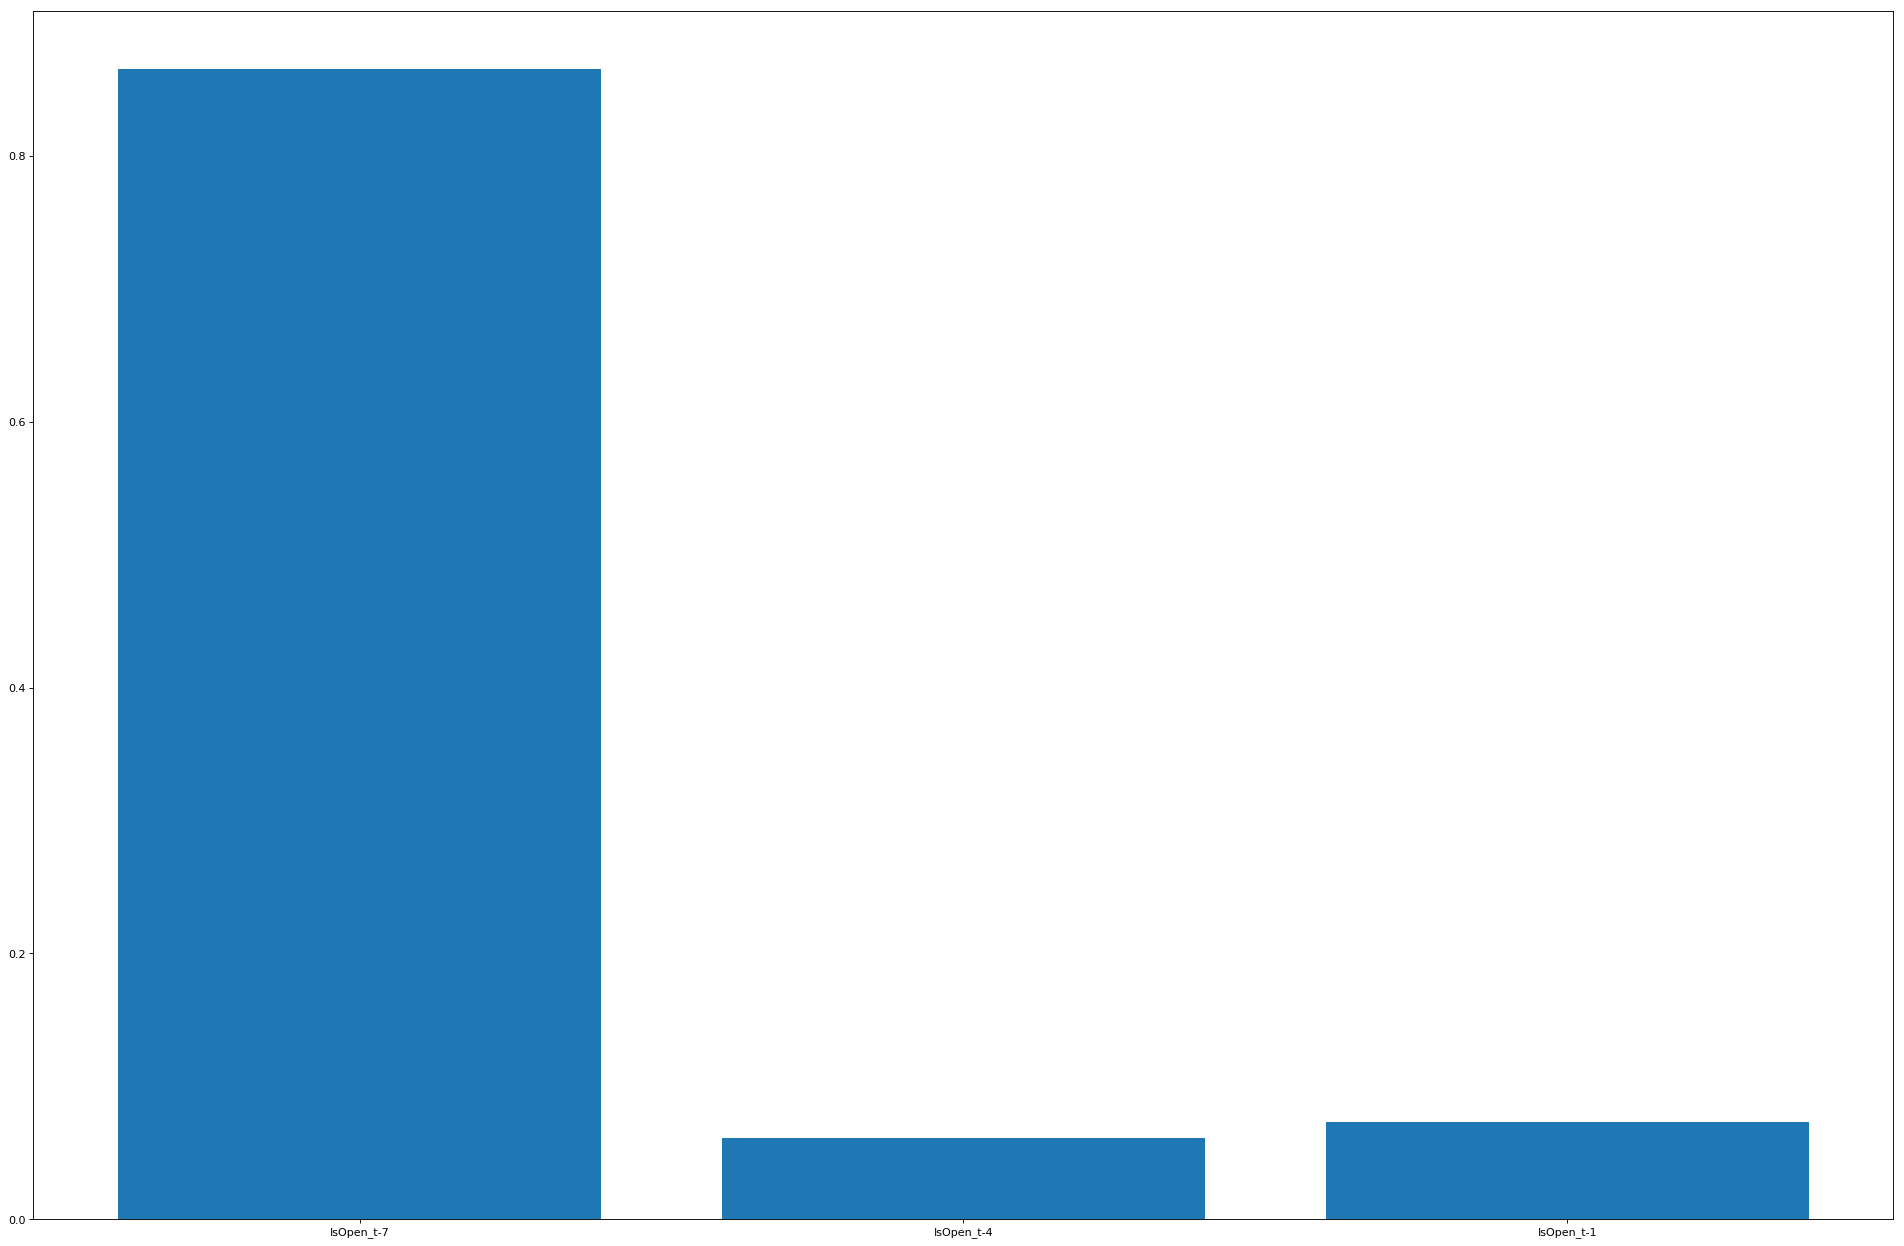

In [64]:
# plot importance scores
names = dataset.columns.values[-n_lags:]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

As a stochastic result, a bit of difference with respect to what we predicted was expected, but the overall result seems solid

In [24]:
#dataset.to_csv('./dataset/ARIMA_prep_train.csv', index=False)
#dataset.to_csv('./dataset/preprocessed_train.csv', index=False)

# HAS PROMOTIONS case

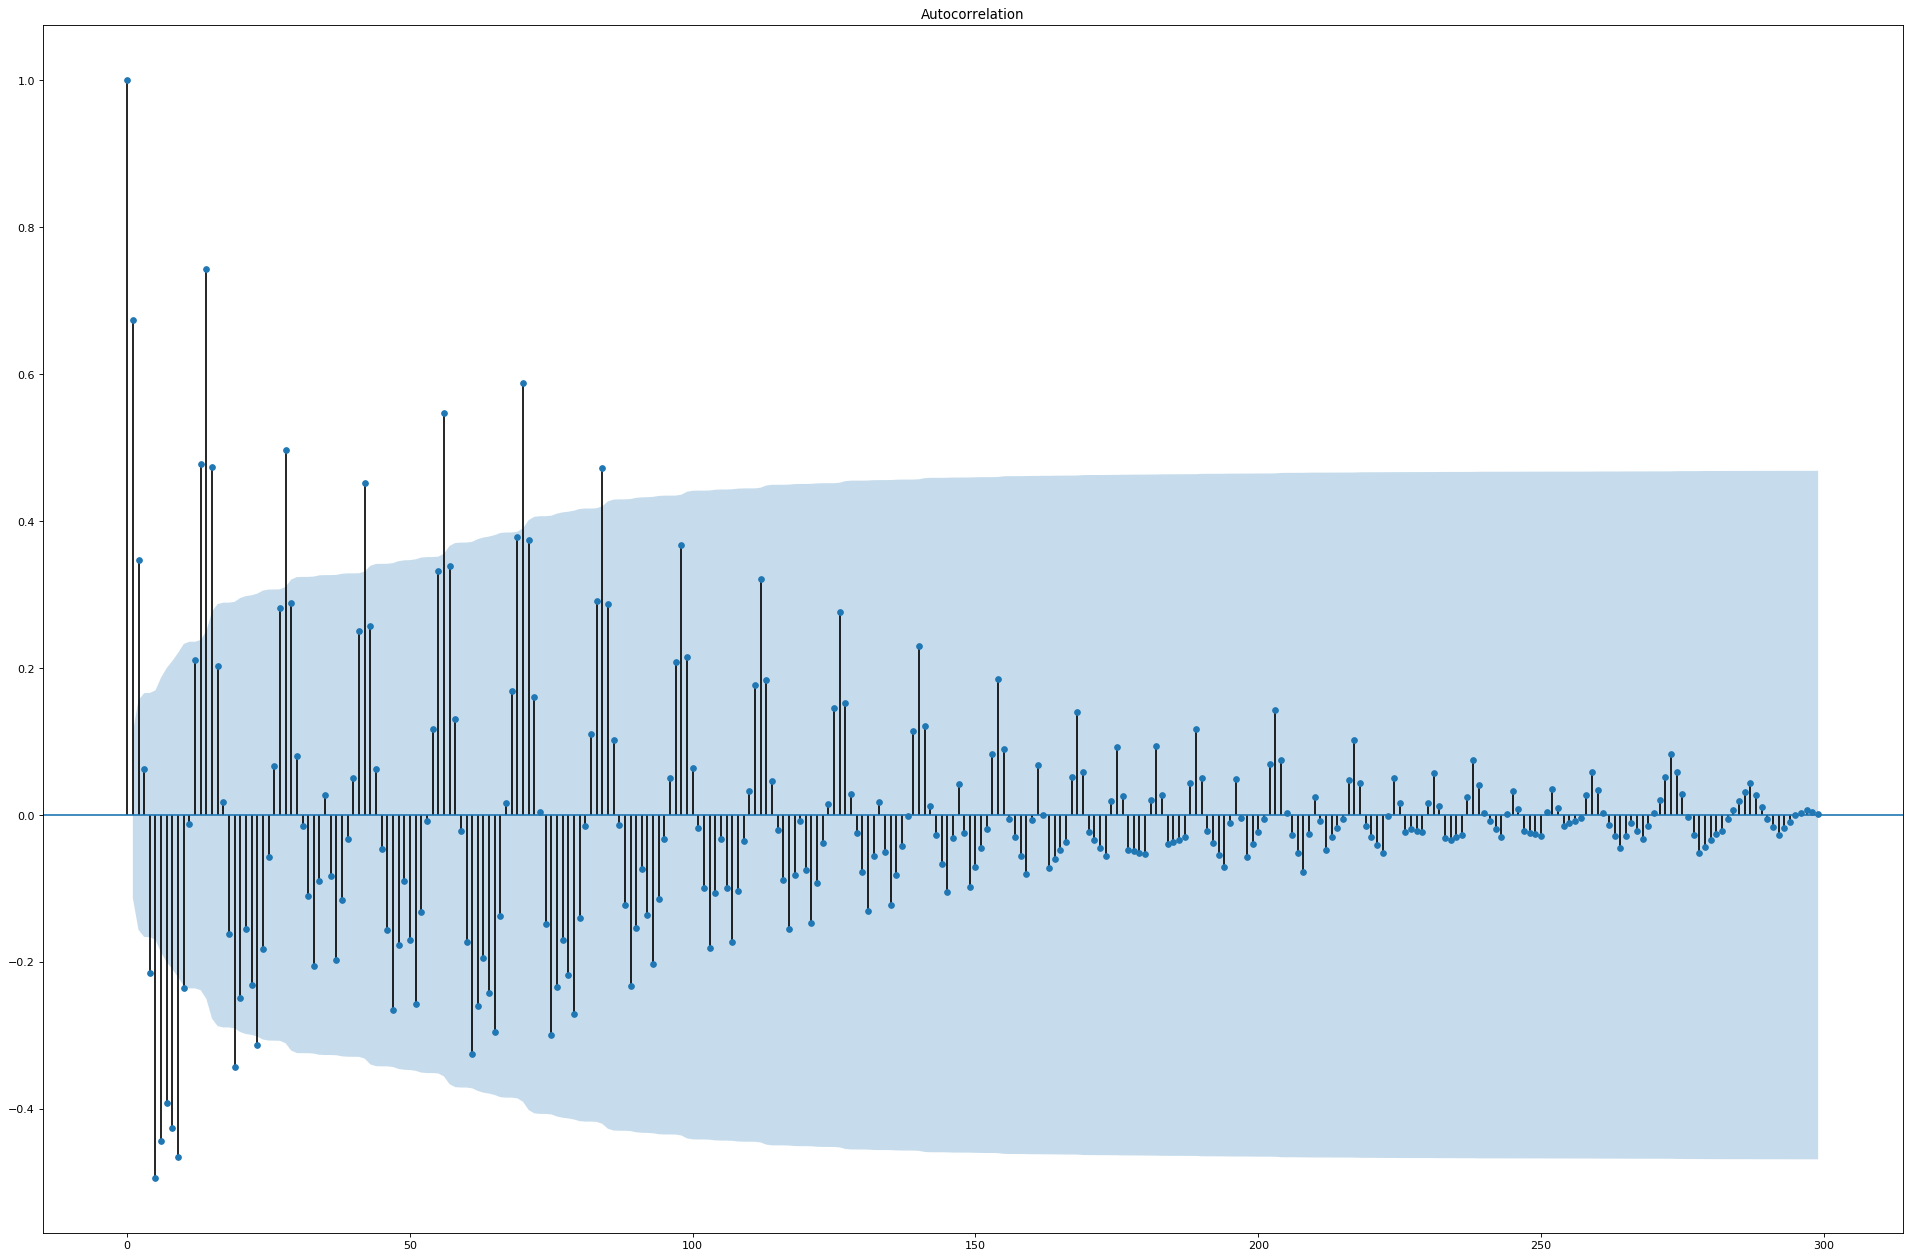

In [90]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sumofstores['HasPromotions'][:300])
plt.show()

In [91]:
lags_ordered_importance = ['1','2']
#dataset['t-'+str(lags_ordered_importance[1])]=dataset['NumberOfSales'].shift(int(lags_ordered_importance[1]))

In [92]:
n_lags = 2
for i in range(n_lags):
    dataset['HasPromotions_t-'+str(lags_ordered_importance[i])] = \
                dataset['HasPromotions'].shift(int(lags_ordered_importance[i]))
    #dataset['t'] = series.values
    #dataset.head(20)
    #dataset = dataset[20:]
 


In [93]:
dataset =dataset[7:]

In [94]:
array = dataset.values

In [95]:
from sklearn.ensemble import RandomForestRegressor
# load data
array = dataset.values
# split into input and output
X = array[:,-n_lags:]
y = array[:,10]
# fit random forest model
model = RandomForestRegressor(n_estimators=4, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)

[0.31678061 0.68321939]


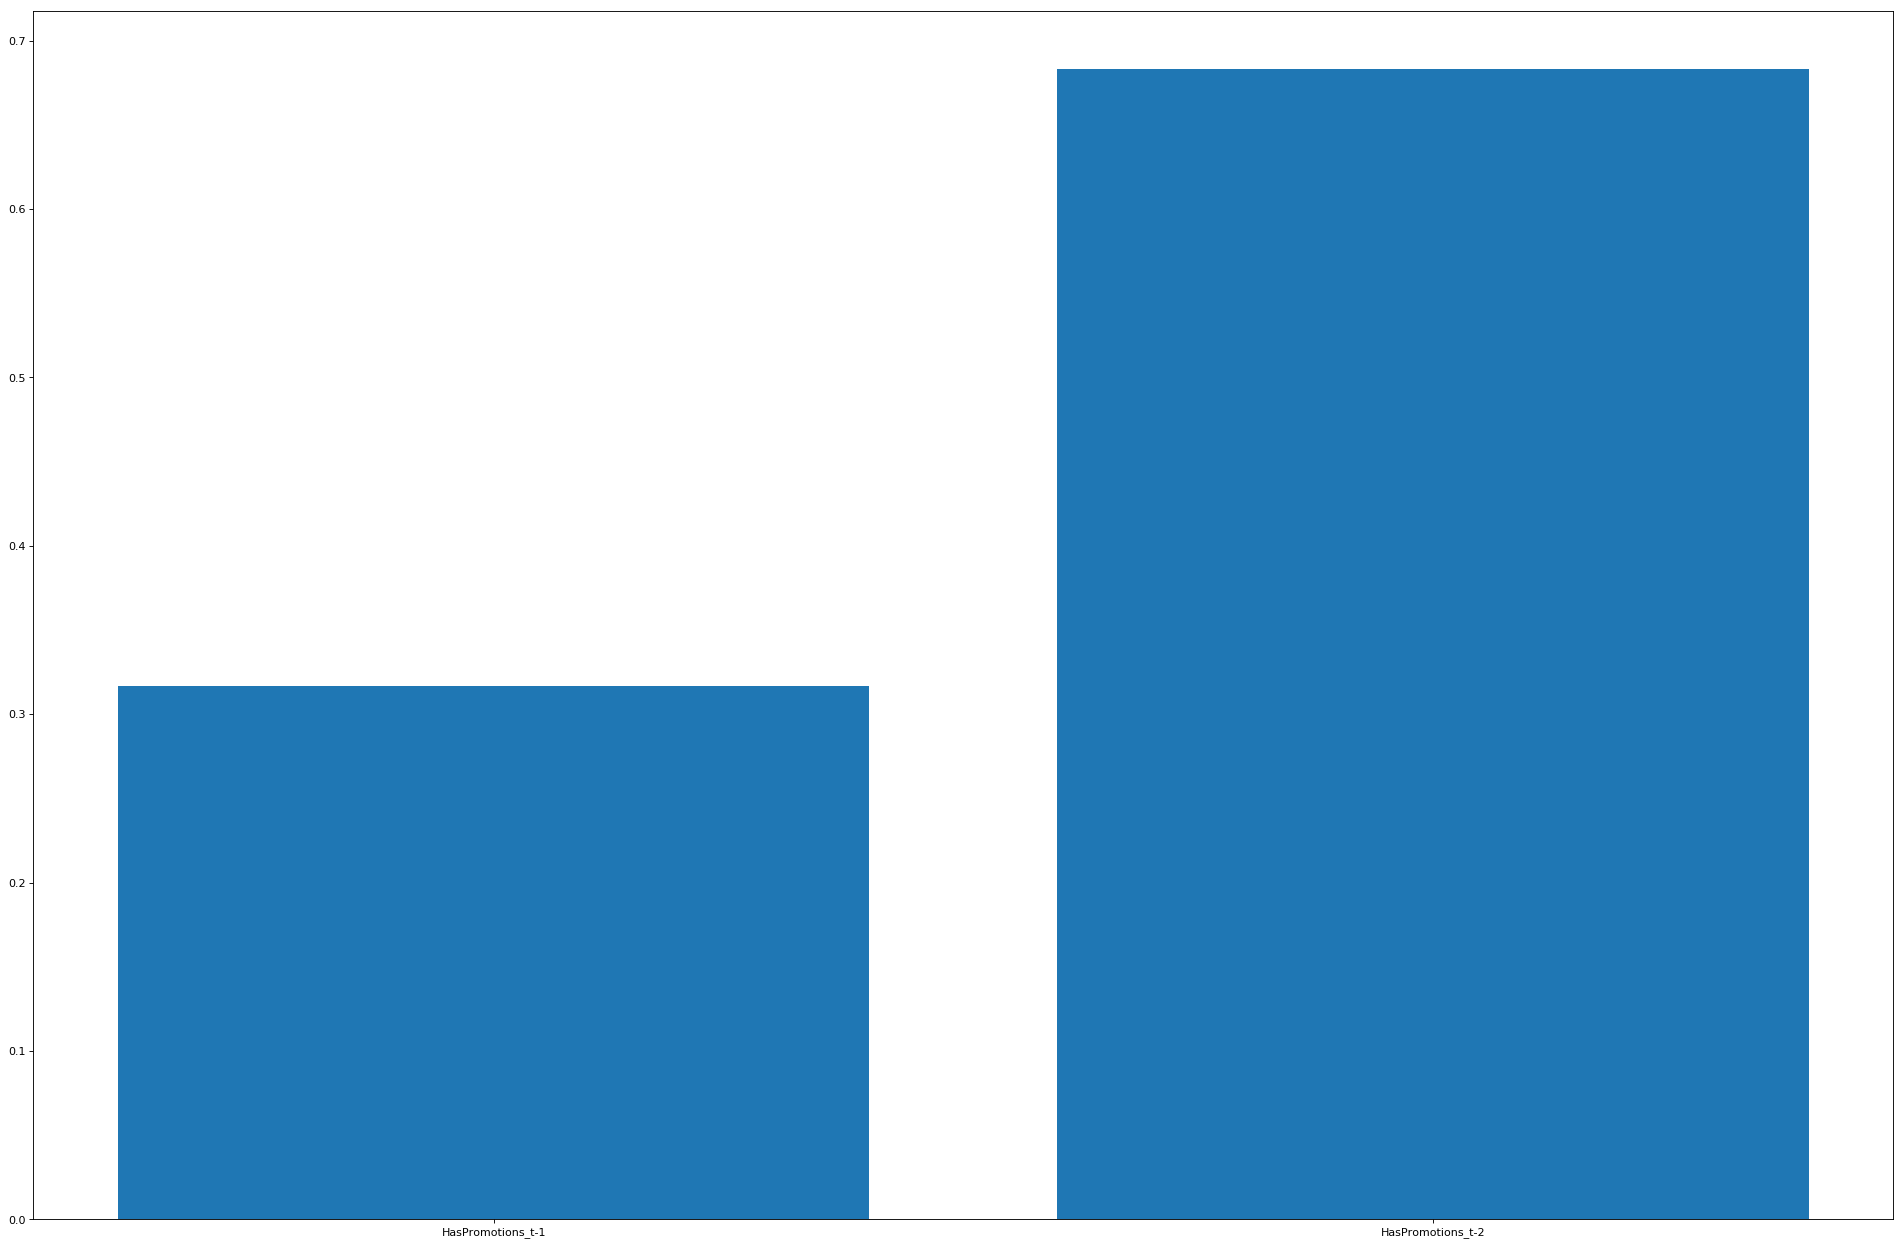

In [96]:
# plot importance scores
names = dataset.columns.values[-n_lags:]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

Dropping first 20 days of observations for every store?

In [97]:
dataset.shape

(523014, 53)

In [99]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [100]:
dataset.head().T

,7,8,9,10,11
StoreID,1000,1000,1000,1000,1000
Date,2016-03-09 00:00:00,2016-03-10 00:00:00,2016-03-11 00:00:00,2016-03-12 00:00:00,2016-03-13 00:00:00
IsHoliday,0,0,0,0,0
IsOpen,1,1,1,1,0
HasPromotions,1,1,1,0,0
StoreType,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market
AssortmentType,General,General,General,General,General
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,690,617,636,511,0


In [101]:
dataset.to_csv('./dataset/preprocessed_PCA_train.csv')

## dont't run from here on

In [63]:
d = dataset.drop(dataset[(dataset.Month == 3) & (dataset.Day < 21)].index)


In [64]:
d.shape

(409237, 53)

In [66]:
print("eliminated rows:")
433908-409237 

eliminated rows:


24671

In [67]:
dataset = d.drop(['Month','Day','Year'], axis=1)

In [68]:
dataset.shape

(409237, 50)

In [77]:
dataset.iloc[550:610,:6]

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,NearestCompetitor
714,1000,2018-02-14,0,1,0,326
715,1000,2018-02-15,0,1,0,326
716,1000,2018-02-16,0,1,0,326
717,1000,2018-02-17,0,1,0,326
719,1000,2018-02-19,0,1,1,326
720,1000,2018-02-20,0,1,1,326
721,1000,2018-02-21,0,1,1,326
722,1000,2018-02-22,0,1,1,326
723,1000,2018-02-23,0,1,1,326
724,1000,2018-02-24,0,1,0,326


In [70]:
#dataset.to_csv('./dataset/ARIMA_prep_train.csv', index=False)